In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv('historico_siniestros_bogota.csv')
df.head()

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,-74.090924,4.693807,1,A000640275,4484660,2017/06/12 00:00:00+00,2017,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:30:00+00,4.693807,-74.090924,10006772.0,221236.0
1,-74.121000,4.603000,2,A001233353,10533499,2020/11/19 00:00:00+00,2020,CL 26 S- KR 50 02,CON HERIDOS,OTRO,PUENTE ARANDA,2020/11/19 02:05:00+00,4.603000,-74.121000,16004560.0,NaN
2,-74.042000,4.682000,4,A001232786,10533629,2020/11/10 00:00:00+00,2020,KR 9 - CL 100 02,SOLO DANOS,CHOQUE,USAQUEN,2020/11/10 13:30:00+00,4.682000,-74.042000,30001107.0,NaN
3,-74.166937,4.587187,7,A000200705,4412699,2015/05/11 00:00:00+00,2015,CL 63A-KR 72 S 02,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,2015/05/11 10:50:00+00,4.587187,-74.166937,19001483.0,136166.0
4,-74.092901,4.607648,8,A000402862,4447845,2016/06/08 00:00:00+00,2016,KR 27-CL 9 14,SOLO DANOS,CHOQUE,LOS MARTIRES,2016/06/08 21:30:00+00,4.607648,-74.092901,14000548.0,239719.0


In [3]:
df.shape

(199146, 16)

In [4]:
# duplicate data
df.columns

Index(['X', 'Y', 'OBJECTID', 'FORMULARIO', 'CODIGO_ACCIDENTE',
       'FECHA_OCURRENCIA_ACC', 'ANO_OCURRENCIA_ACC', 'DIRECCION', 'GRAVEDAD',
       'CLASE_ACC', 'LOCALIDAD', 'FECHA_HORA_ACC', 'LATITUD', 'LONGITUD',
       'CIV', 'PK_CALZADA'],
      dtype='object')

In [5]:
df.ANO_OCURRENCIA_ACC.value_counts()

2018    33418
2019    32962
2017    32415
2016    31928
2015    27885
2020    22424
2021    18114
Name: ANO_OCURRENCIA_ACC, dtype: int64

In [6]:
df.GRAVEDAD.value_counts()

SOLO DANOS     128207
CON HERIDOS     67700
CON MUERTOS      3239
Name: GRAVEDAD, dtype: int64

In [7]:
df.CIV.nunique() # el código de identificación vial (CIV)

38419

In [8]:
df.PK_CALZADA.isnull().sum()

37974

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199146 entries, 0 to 199145
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     199146 non-null  float64
 1   Y                     199146 non-null  float64
 2   OBJECTID              199146 non-null  int64  
 3   FORMULARIO            199146 non-null  object 
 4   CODIGO_ACCIDENTE      199146 non-null  int64  
 5   FECHA_OCURRENCIA_ACC  199146 non-null  object 
 6   ANO_OCURRENCIA_ACC    199146 non-null  int64  
 7   DIRECCION             199146 non-null  object 
 8   GRAVEDAD              199146 non-null  object 
 9   CLASE_ACC             199146 non-null  object 
 10  LOCALIDAD             199100 non-null  object 
 11  FECHA_HORA_ACC        199146 non-null  object 
 12  LATITUD               199146 non-null  float64
 13  LONGITUD              199146 non-null  float64
 14  CIV                   197445 non-null  float64
 15  

In [10]:
df.head()

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,-74.090924,4.693807,1,A000640275,4484660,2017/06/12 00:00:00+00,2017,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:30:00+00,4.693807,-74.090924,10006772.0,221236.0
1,-74.121000,4.603000,2,A001233353,10533499,2020/11/19 00:00:00+00,2020,CL 26 S- KR 50 02,CON HERIDOS,OTRO,PUENTE ARANDA,2020/11/19 02:05:00+00,4.603000,-74.121000,16004560.0,NaN
2,-74.042000,4.682000,4,A001232786,10533629,2020/11/10 00:00:00+00,2020,KR 9 - CL 100 02,SOLO DANOS,CHOQUE,USAQUEN,2020/11/10 13:30:00+00,4.682000,-74.042000,30001107.0,NaN
3,-74.166937,4.587187,7,A000200705,4412699,2015/05/11 00:00:00+00,2015,CL 63A-KR 72 S 02,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,2015/05/11 10:50:00+00,4.587187,-74.166937,19001483.0,136166.0
4,-74.092901,4.607648,8,A000402862,4447845,2016/06/08 00:00:00+00,2016,KR 27-CL 9 14,SOLO DANOS,CHOQUE,LOS MARTIRES,2016/06/08 21:30:00+00,4.607648,-74.092901,14000548.0,239719.0


In [15]:
df['year'] = pd.DatetimeIndex(df['FECHA_HORA_ACC']).year

In [18]:
df['month'] = pd.DatetimeIndex(df['FECHA_HORA_ACC']).month

In [21]:
df['day'] = pd.DatetimeIndex(df['FECHA_HORA_ACC']).day

In [26]:
df['day_name'] = pd.DatetimeIndex(df['FECHA_HORA_ACC']).day_name()

In [27]:
df.head(3)

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA,year,month,day,day_name
0,-74.090924,4.693807,1,A000640275,4484660,2017/06/12 00:00:00+00,2017,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,2017/06/12 05:30:00+00,4.693807,-74.090924,10006772.0,221236.0,2017,6,12,Monday
1,-74.121000,4.603000,2,A001233353,10533499,2020/11/19 00:00:00+00,2020,CL 26 S- KR 50 02,CON HERIDOS,OTRO,PUENTE ARANDA,2020/11/19 02:05:00+00,4.603000,-74.121000,16004560.0,NaN,2020,11,19,Thursday
2,-74.042000,4.682000,4,A001232786,10533629,2020/11/10 00:00:00+00,2020,KR 9 - CL 100 02,SOLO DANOS,CHOQUE,USAQUEN,2020/11/10 13:30:00+00,4.682000,-74.042000,30001107.0,NaN,2020,11,10,Tuesday


agrupación por gravedad, clase de accidente y año

In [16]:
df_a = df.groupby(['GRAVEDAD','CLASE_ACC','year']).OBJECTID.count().reset_index()

In [19]:
df_a.head(3)

,GRAVEDAD,CLASE_ACC,year,OBJECTID
0,CON HERIDOS,ATROPELLO,2015,3213
1,CON HERIDOS,ATROPELLO,2016,3177
2,CON HERIDOS,ATROPELLO,2017,2911


In [22]:
#df_a.to_csv('agrupacion_gravedad_clase_acc.csv')

La clase de accidente por localidad


In [20]:
df.groupby(['CLASE_ACC','LOCALIDAD','year','month']).OBJECTID.count().reset_index()

,CLASE_ACC,LOCALIDAD,year,month,OBJECTID
0,ATROPELLO,ANTONIO NARINO,2015,1,5
1,ATROPELLO,ANTONIO NARINO,2015,2,4
2,ATROPELLO,ANTONIO NARINO,2015,3,6
3,ATROPELLO,ANTONIO NARINO,2015,4,6
4,ATROPELLO,ANTONIO NARINO,2015,5,8
...,...,...,...,...,...
6103,VOLCAMIENTO,USME,2021,2,3
6104,VOLCAMIENTO,USME,2021,3,2
6105,VOLCAMIENTO,USME,2021,4,5
6106,VOLCAMIENTO,USME,2021,6,2


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'ENGATIVA'),
  Text(1, 0, 'PUENTE ARANDA'),
  Text(2, 0, 'USAQUEN'),
  Text(3, 0, 'CIUDAD BOLIVAR'),
  Text(4, 0, 'LOS MARTIRES'),
  Text(5, 0, 'SUBA'),
  Text(6, 0, 'FONTIBON'),
  Text(7, 0, 'USME'),
  Text(8, 0, 'TEUSAQUILLO'),
  Text(9, 0, 'BARRIOS UNIDOS'),
  Text(10, 0, 'RAFAEL URIBE URIBE'),
  Text(11, 0, 'CHAPINERO'),
  Text(12, 0, 'KENNEDY'),
  Text(13, 0, 'ANTONIO NARINO'),
  Text(14, 0, 'BOSA'),
  Text(15, 0, 'SAN CRISTOBAL'),
  Text(16, 0, 'CANDELARIA'),
  Text(17, 0, 'TUNJUELITO'),
  Text(18, 0, 'SANTA FE'),
  Text(19, 0, 'SUMAPAZ')])

<Figure size 1080x576 with 0 Axes>

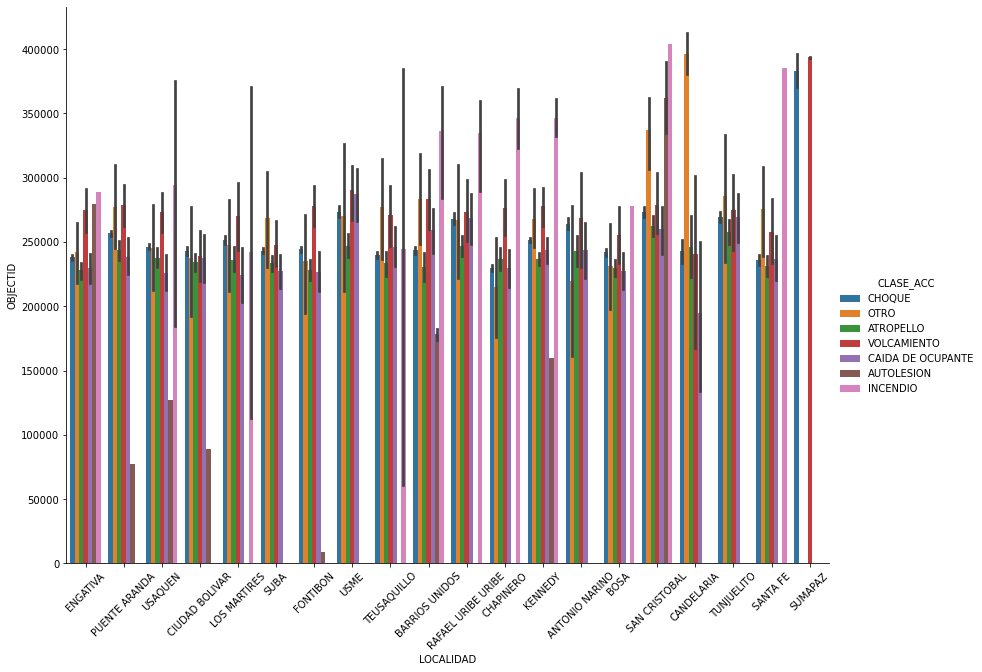

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,8))
ax = sns.catplot(x="LOCALIDAD", y="OBJECTID", hue="CLASE_ACC", kind="bar", data=df, height=8.27, aspect=25.7/18.27)
plt.xticks(rotation=45)


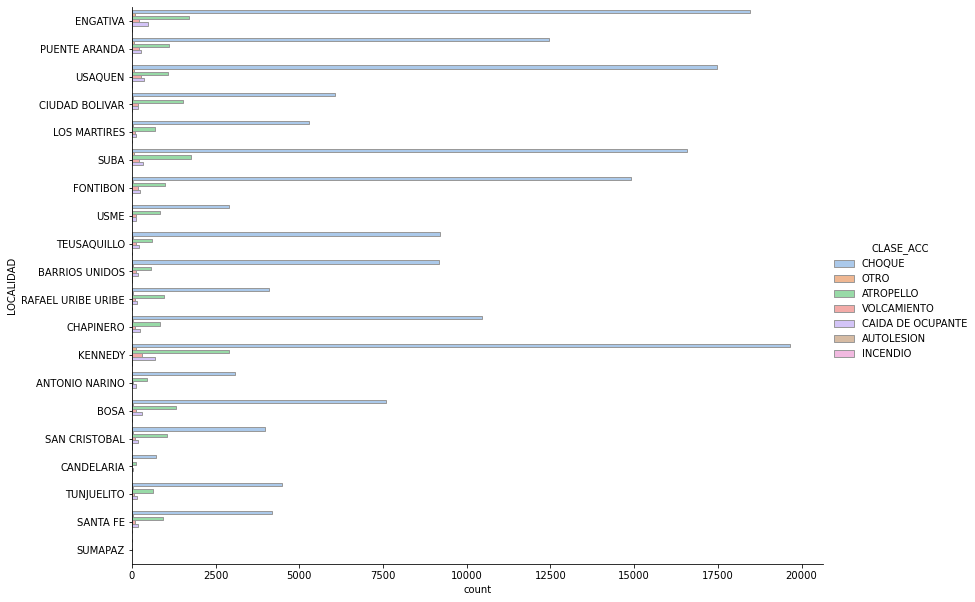

In [38]:
sns.catplot(y="LOCALIDAD", hue="CLASE_ACC", kind="count",
            palette="pastel", edgecolor=".6",
            data=df, height=8.27, aspect=11.7/8.27)

localidad de accidentes por localidad 

In [24]:
df.groupby(['CLASE_ACC','LOCALIDAD','year','month','day']).OBJECTID.count().reset_index()

,CLASE_ACC,LOCALIDAD,year,month,day,OBJECTID
0,ATROPELLO,ANTONIO NARINO,2015,1,15,1
1,ATROPELLO,ANTONIO NARINO,2015,1,22,1
2,ATROPELLO,ANTONIO NARINO,2015,1,23,1
3,ATROPELLO,ANTONIO NARINO,2015,1,25,1
4,ATROPELLO,ANTONIO NARINO,2015,1,29,1
...,...,...,...,...,...,...
62574,VOLCAMIENTO,USME,2021,6,24,1
62575,VOLCAMIENTO,USME,2021,6,25,1
62576,VOLCAMIENTO,USME,2021,7,5,1
62577,VOLCAMIENTO,USME,2021,7,6,1


In [62]:
marrimeko=df.LOCALIDAD.value_counts().to_frame()
marrimeko

,LOCALIDAD
KENNEDY,23661
ENGATIVA,20928
USAQUEN,19292
SUBA,18973
FONTIBON,16377
PUENTE ARANDA,14143
CHAPINERO,11696
TEUSAQUILLO,10167
BARRIOS UNIDOS,10094
BOSA,9417


In [63]:
marrimeko['LOCALIDAD'].values

array([23661, 20928, 19292, 18973, 16377, 14143, 11696, 10167, 10094,
        9417,  8005,  6250,  5451,  5351,  5335,  5333,  4017,  3721,
         882,     7], dtype=int64)

In [65]:
label=marrimeko.index
label

Index(['KENNEDY', 'ENGATIVA', 'USAQUEN', 'SUBA', 'FONTIBON', 'PUENTE ARANDA',
       'CHAPINERO', 'TEUSAQUILLO', 'BARRIOS UNIDOS', 'BOSA', 'CIUDAD BOLIVAR',
       'LOS MARTIRES', 'SANTA FE', 'TUNJUELITO', 'SAN CRISTOBAL',
       'RAFAEL URIBE URIBE', 'USME', 'ANTONIO NARINO', 'CANDELARIA',
       'SUMAPAZ'],
      dtype='object')